In [21]:
# Importing Useful Libraries

import pandas as pd
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Activation, Conv2D, MaxPooling2D,BatchNormalization
from tensorflow.keras import optimizers
from keras.models import load_model
from tensorflow.keras.preprocessing import image
import os
from os import listdir
import os
import random
import scipy
import pylab as pl
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import warnings 
warnings.filterwarnings("ignore")

# Loading Directories

In [22]:
Train_data_dir=r'C:/Users/verma/Desktop/Garments/Train'
validation_data_dir=r'C:/Users/verma/Desktop/Garments/Test'

In [23]:
# Seeing the Number of classes in the training folder
file = os.listdir(r"C:/Users/verma/Desktop/Garments/Train")
file

['Jeans men', 'Sarees', 'Trouser men']

# Loading Some Scrapped Image Samples

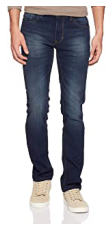

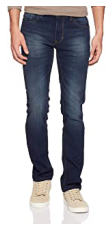

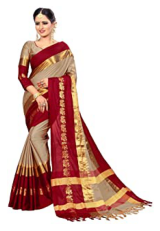

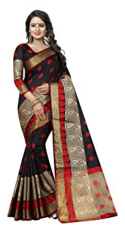

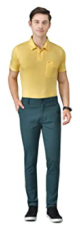

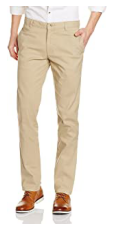

In [24]:
# Sample images which I have scrapped from amazon
import matplotlib.image as mpimg
Jeans_train=r"C:/Users/verma/Desktop/Garments/Train/Jeans men"
Saree_train=r"C:/Users/verma/Desktop/Garments/Train/Sarees"
Trouser_train=r"C:/Users/verma/Desktop/Garments/Train/Trouser men"


Dir_train=[Jeans_train, Saree_train, Trouser_train]
for dirs in Dir_train:
    k=listdir(dirs)
    for i in k[:2]:
        img=mpimg.imread('{}/{}'.format(dirs,i))
        plt.imshow(img)
        plt.axis('off')
        plt.show()

In [42]:

# Defining Dimensions for the image to be input and then loading the images
input_shape=(576,576,3)
img_width=576
img_height=576
nb_train_samples=192
nb_validation_samples=48
batch_size=8
epoch=150

# Preparing Data for Training

In [43]:
# Training Data Generator( Data Augmentation on Training Images)

Train_generator_augmented=ImageDataGenerator(rescale=1./255,
                                             zoom_range=0.2,
                                             rotation_range=30,
                                             horizontal_flip=True)
Train_generator=Train_generator_augmented.flow_from_directory(Train_data_dir,
                                                              target_size=(img_width,img_height),
                                                              batch_size=batch_size, 
                                                              class_mode='categorical')

# Validation Data Generator
Data_gen=ImageDataGenerator(rescale=1./255)
validation_generator=Data_gen.flow_from_directory(validation_data_dir,
                                                  target_size=(img_width,img_height),
                                                  batch_size=batch_size, 
                                                  class_mode='categorical')

Found 576 images belonging to 3 classes.
Found 144 images belonging to 3 classes.


# Defining the Model

In [44]:
# Creating the model
model=Sequential()

# First convolution layer
model.add(Conv2D(32,(3,3),input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Second convolution layer
model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Third convolution layer
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Fourth convolution layer
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(3))
model.add(Activation('softmax'))

print(model.summary())

model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 574, 574, 32)      896       
_________________________________________________________________
activation_12 (Activation)   (None, 574, 574, 32)      0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 287, 287, 32)      0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 287, 287, 32)      0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 285, 285, 32)      9248      
_________________________________________________________________
activation_13 (Activation)   (None, 285, 285, 32)      0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 142, 142, 32)     

# Defining Early stopping and Model check point

In [45]:
# Defining Early stopping and Model check point
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

ES = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=30)
MC = ModelCheckpoint('amazon.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

# Fitting the data into the model

In [46]:
# Fitting the Training Data
history = model.fit_generator(
    Train_generator, 
    epochs=epoch,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples//batch_size,
    steps_per_epoch=nb_train_samples//batch_size,
    callbacks=[ES,MC])

Epoch 1/150
24/24 [==============================] - 46s 2s/step - loss: 5.5337 - accuracy: 0.4149 - val_loss: 1.0813 - val_accuracy: 0.6250

Epoch 00001: val_accuracy improved from -inf to 0.62500, saving model to amazon.h5
Epoch 2/150
24/24 [==============================] - 45s 2s/step - loss: 1.0297 - accuracy: 0.5259 - val_loss: 0.8852 - val_accuracy: 0.5417

Epoch 00002: val_accuracy did not improve from 0.62500
Epoch 3/150
24/24 [==============================] - 45s 2s/step - loss: 0.8417 - accuracy: 0.5600 - val_loss: 0.8210 - val_accuracy: 0.7292

Epoch 00003: val_accuracy improved from 0.62500 to 0.72917, saving model to amazon.h5
Epoch 4/150
24/24 [==============================] - 45s 2s/step - loss: 0.5850 - accuracy: 0.6734 - val_loss: 0.5138 - val_accuracy: 0.8125

Epoch 00004: val_accuracy improved from 0.72917 to 0.81250, saving model to amazon.h5
Epoch 5/150
24/24 [==============================] - 45s 2s/step - loss: 0.7236 - accuracy: 0.6906 - val_loss: 0.7204 - va

In [47]:
# Model Evaluation
evl=model.evaluate(validation_generator,steps=1)
print("Test Loss",evl[0])
print("Test Accuracy",evl[1])

1/1 [==============================] - 0s 493ms/step - loss: 0.4359 - accuracy: 0.8750
Test Loss 0.4358510971069336
Test Accuracy 0.875


# On 48 Epoch itself the val_accuracy is: 97.91% and val_loss: 34.08%,thus saving the best model

# saving the best mode

In [48]:

# Saving the best model where val_accuracy is maximum.
model.save('amazon.h5')

In [49]:
# 150 Epochs Summary
pd.DataFrame(history.history)

loss  accuracy  val_loss  val_accuracy
0   2.800292  0.432292  1.081253      0.625000
1   1.041831  0.546875  0.885202      0.541667
2   0.809830  0.557292  0.820985      0.729167
3   0.597723  0.697917  0.513800      0.812500
4   0.633171  0.718750  0.720422      0.708333
..       ...       ...       ...           ...
83  0.496838  0.796875  0.311757      0.895833
84  0.376081  0.833333  0.318565      0.916667
85  0.636464  0.723958  0.390544      0.895833
86  0.406245  0.817708  0.464432      0.854167
87  0.478154  0.744792  0.400660      0.812500

[88 rows x 4 columns]

# Visualizing Training

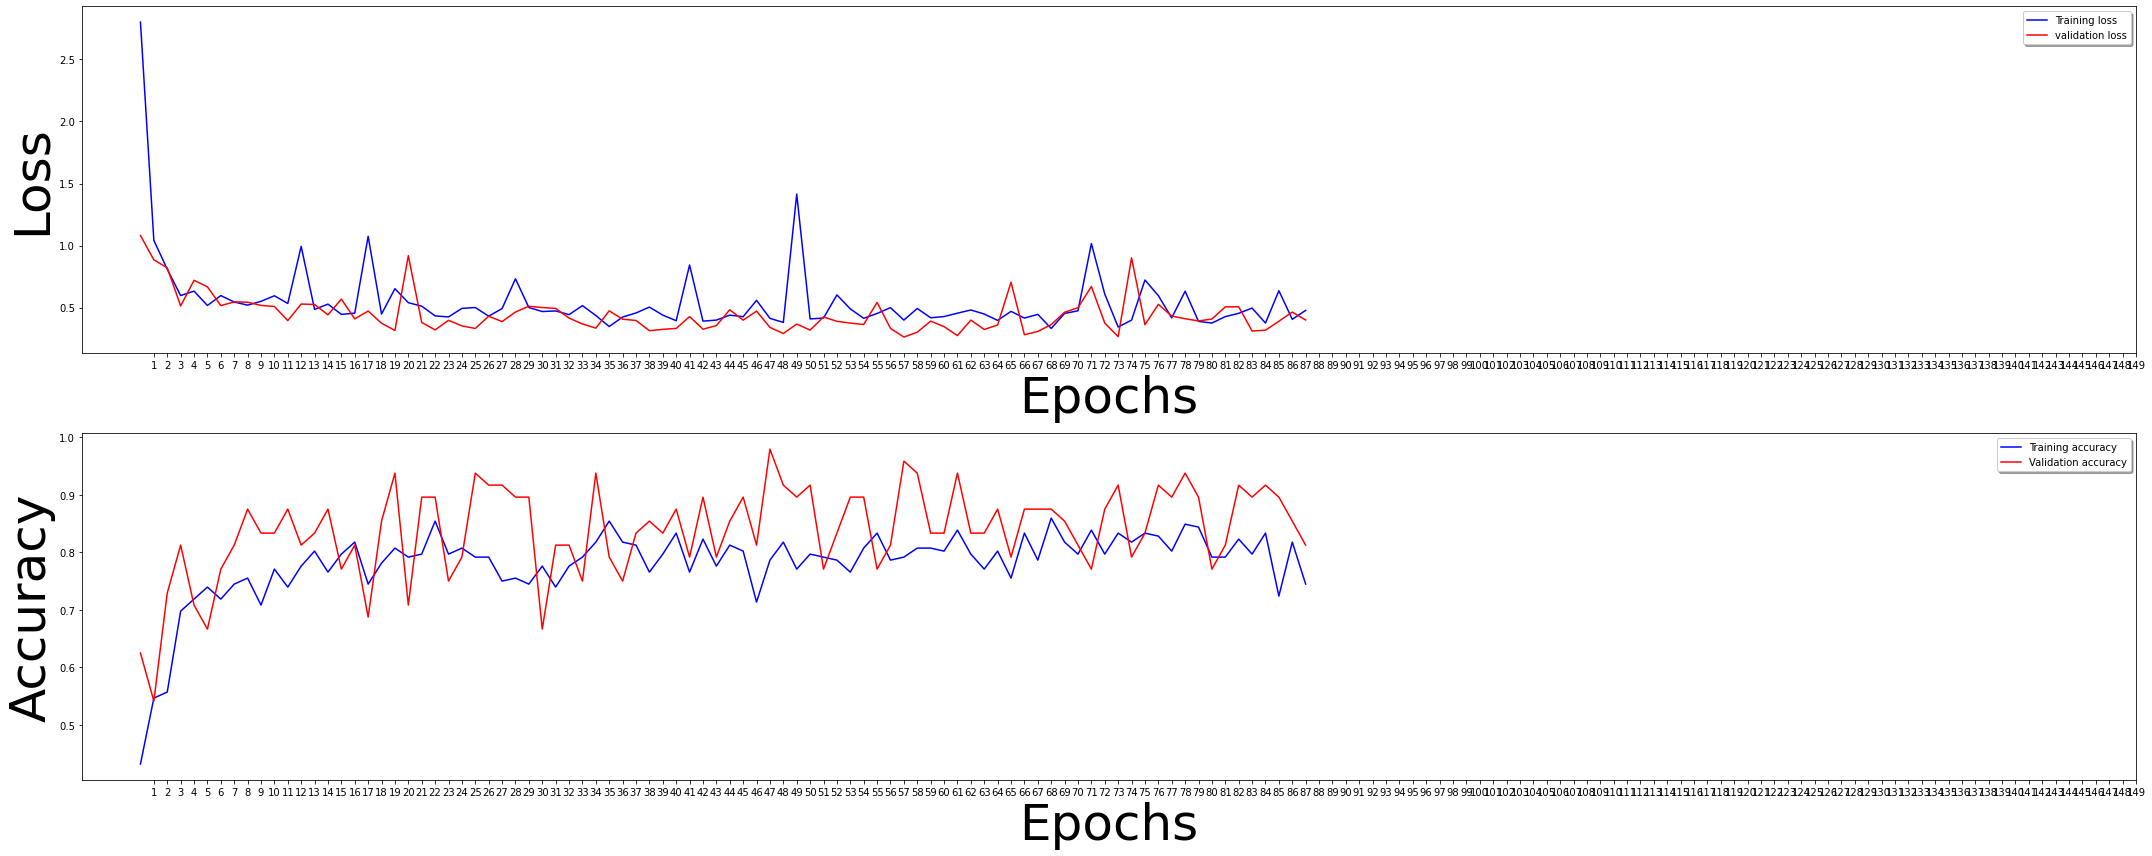

In [51]:

# Visualizing  Training
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(30, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epoch, 1),)
ax1.set_xlabel('Epochs' ,fontsize=50)
ax1.set_ylabel('Loss' ,fontsize=50)
ax1.legend(loc='best', shadow=True)

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xlabel('Epochs' ,fontsize=50)
ax2.set_ylabel('Accuracy' ,fontsize=50)
ax2.set_xticks(np.arange(1, epoch, 1))

ax2.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

# As we can see that accuracy is increasing and losses are decreasing as number of epochs are increasing.

In [52]:

# As we can see that there are 3 classes for the 144 test images
print(validation_generator.classes)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [53]:

# Lets load our model

saved_model = load_model('amazon.h5')

# Predicting Images

Input Image is: img_451.jpeg


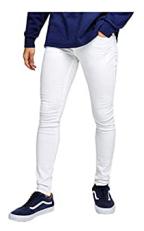

Predicted Label is: trouser

Input Image is: img_452.jpeg


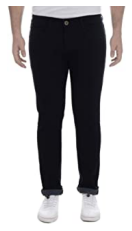

Predicted Label is: trouser

Input Image is: img_453.jpeg


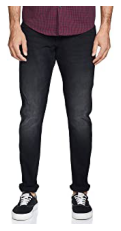

Predicted Label is: jeans

Input Image is: img_454.jpeg


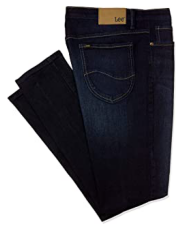

Predicted Label is: jeans

Input Image is: img_461.jpeg


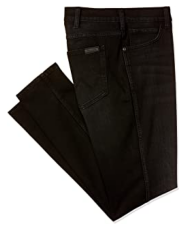

Predicted Label is: trouser

Input Image is: img_462.jpeg


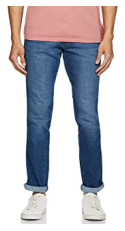

Predicted Label is: jeans

Input Image is: img_463.jpeg


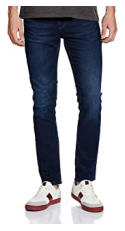

Predicted Label is: jeans

Input Image is: img_464.jpeg


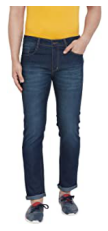

Predicted Label is: jeans

Input Image is: img_471.jpeg


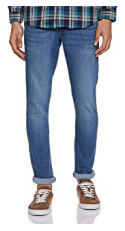

Predicted Label is: jeans

Input Image is: img_472.jpeg


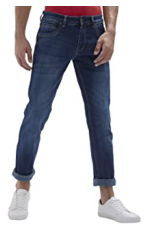

Predicted Label is: jeans

Input Image is: img_473.jpeg


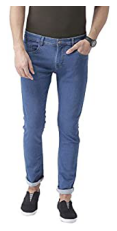

Predicted Label is: jeans

Input Image is: img_474.jpeg


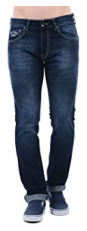

Predicted Label is: jeans

Input Image is: img_481.jpeg


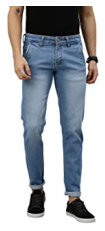

Predicted Label is: jeans

Input Image is: img_482.jpeg


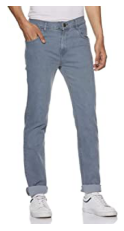

Predicted Label is: jeans

Input Image is: img_483.jpeg


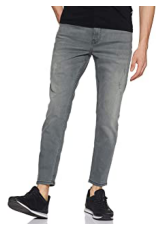

Predicted Label is: trouser

Input Image is: img_484.jpeg


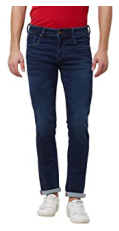

Predicted Label is: jeans

Input Image is: img_491.jpeg


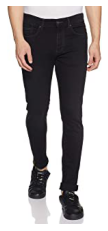

Predicted Label is: trouser

Input Image is: img_492.jpeg


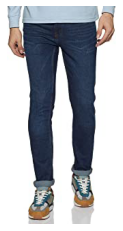

Predicted Label is: jeans

Input Image is: img_493.jpeg


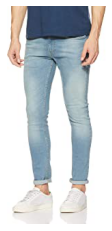

Predicted Label is: jeans

Input Image is: img_494.jpeg


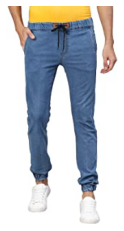

Predicted Label is: jeans

Input Image is: img_501.jpeg


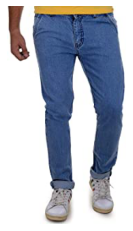

Predicted Label is: jeans

Input Image is: img_502.jpeg


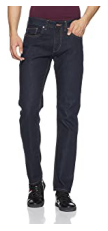

Predicted Label is: jeans

Input Image is: img_503.jpeg


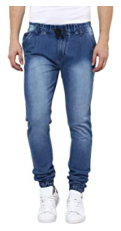

Predicted Label is: jeans

Input Image is: img_504.jpeg


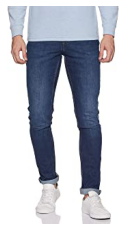

Predicted Label is: jeans

Input Image is: img_511.jpeg


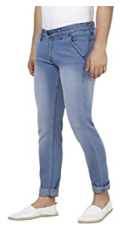

Predicted Label is: jeans

Input Image is: img_512.jpeg


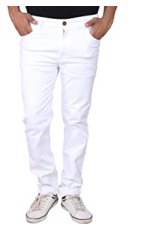

Predicted Label is: trouser

Input Image is: img_513.jpeg


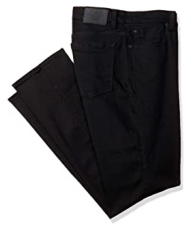

Predicted Label is: trouser

Input Image is: img_514.jpeg


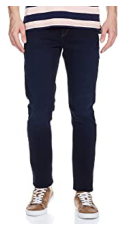

Predicted Label is: jeans

Input Image is: img_521.jpeg


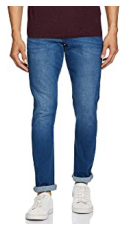

Predicted Label is: jeans

Input Image is: img_522.jpeg


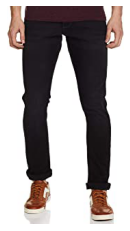

Predicted Label is: trouser

Input Image is: img_523.jpeg


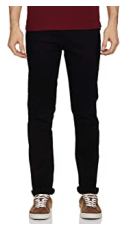

Predicted Label is: jeans

Input Image is: img_524.jpeg


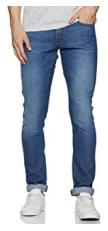

Predicted Label is: jeans

Input Image is: img_531.jpeg


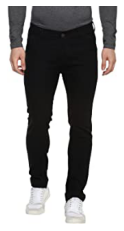

Predicted Label is: jeans

Input Image is: img_532.jpeg


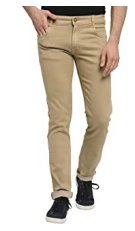

Predicted Label is: trouser

Input Image is: img_533.jpeg


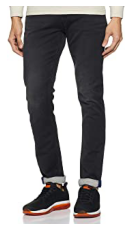

Predicted Label is: trouser

Input Image is: img_534.jpeg


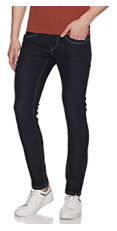

Predicted Label is: jeans

Input Image is: img_541.jpeg


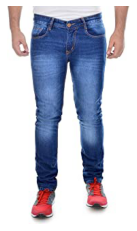

Predicted Label is: jeans

Input Image is: img_542.jpeg


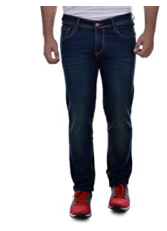

Predicted Label is: jeans

Input Image is: img_543.jpeg


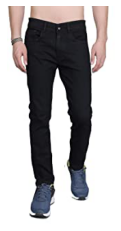

Predicted Label is: trouser

Input Image is: img_544.jpeg


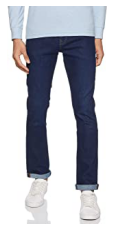

Predicted Label is: jeans

Input Image is: img_551.jpeg


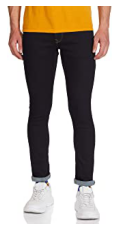

Predicted Label is: jeans

Input Image is: img_552.jpeg


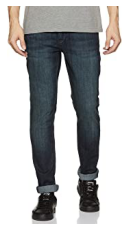

Predicted Label is: jeans

Input Image is: img_553.jpeg


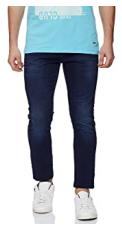

Predicted Label is: jeans

Input Image is: img_554.jpeg


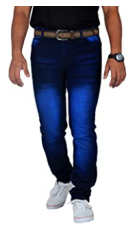

Predicted Label is: jeans

Input Image is: img_561.jpeg


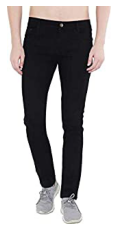

Predicted Label is: jeans

Input Image is: img_562.jpeg


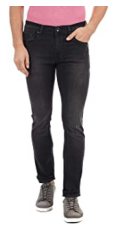

Predicted Label is: jeans

Input Image is: img_563.jpeg


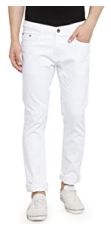

Predicted Label is: trouser

Input Image is: img_564.jpeg


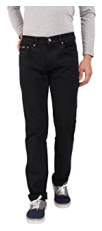

Predicted Label is: trouser

Input Image is: img_01.jpeg


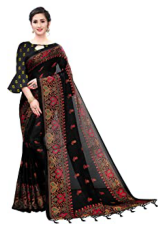

Predicted Label is: sarees

Input Image is: img_02.jpeg


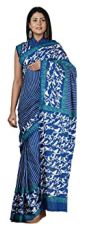

Predicted Label is: sarees

Input Image is: img_03.jpeg


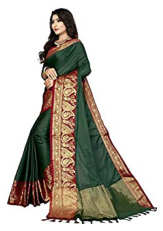

Predicted Label is: sarees

Input Image is: img_04.jpeg


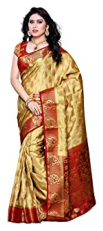

Predicted Label is: sarees

Input Image is: img_103.jpeg


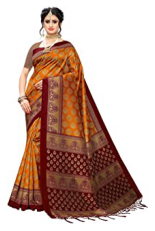

Predicted Label is: sarees

Input Image is: img_104.jpeg


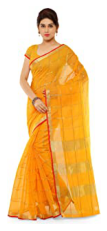

Predicted Label is: sarees

Input Image is: img_11.jpeg


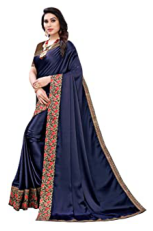

Predicted Label is: sarees

Input Image is: img_111.jpeg


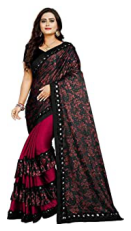

Predicted Label is: sarees

Input Image is: img_112.jpeg


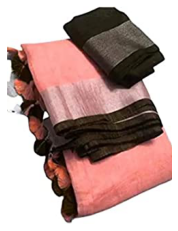

Predicted Label is: sarees

Input Image is: img_113.jpeg


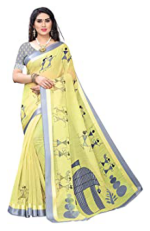

Predicted Label is: sarees

Input Image is: img_114.jpeg


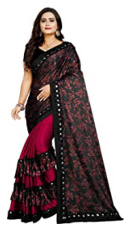

Predicted Label is: sarees

Input Image is: img_12.jpeg


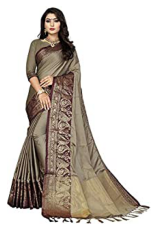

Predicted Label is: sarees

Input Image is: img_121.jpeg


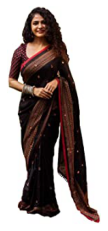

Predicted Label is: sarees

Input Image is: img_122.jpeg


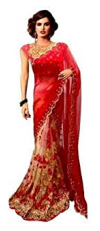

Predicted Label is: sarees

Input Image is: img_13.jpeg


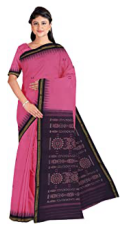

Predicted Label is: sarees

Input Image is: img_14.jpeg


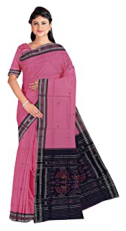

Predicted Label is: sarees

Input Image is: img_21.jpeg


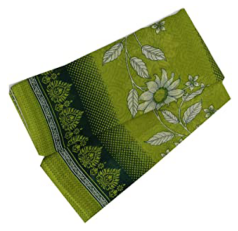

Predicted Label is: sarees

Input Image is: img_22.jpeg


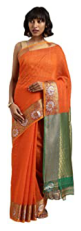

Predicted Label is: sarees

Input Image is: img_23.jpeg


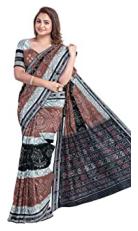

Predicted Label is: sarees

Input Image is: img_24.jpeg


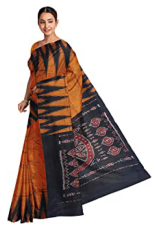

Predicted Label is: sarees

Input Image is: img_31.jpeg


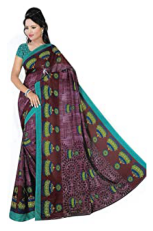

Predicted Label is: sarees

Input Image is: img_32.jpeg


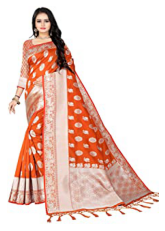

Predicted Label is: sarees

Input Image is: img_33.jpeg


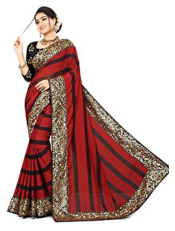

Predicted Label is: sarees

Input Image is: img_34.jpeg


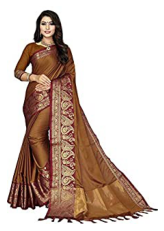

Predicted Label is: sarees

Input Image is: img_41.jpeg


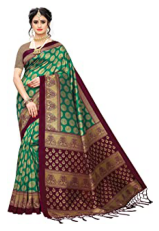

Predicted Label is: sarees

Input Image is: img_42.jpeg


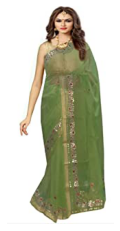

Predicted Label is: sarees

Input Image is: img_43.jpeg


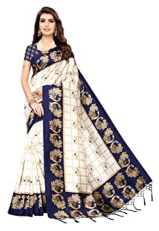

Predicted Label is: sarees

Input Image is: img_44.jpeg


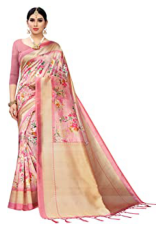

Predicted Label is: sarees

Input Image is: img_51.jpeg


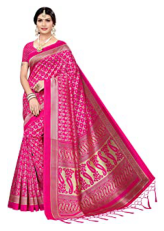

Predicted Label is: sarees

Input Image is: img_52.jpeg


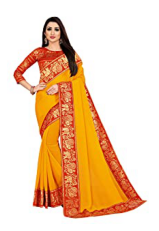

Predicted Label is: sarees

Input Image is: img_53.jpeg


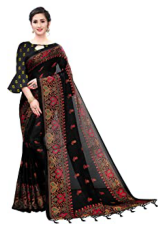

Predicted Label is: sarees

Input Image is: img_54.jpeg


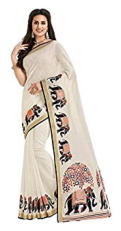

Predicted Label is: sarees

Input Image is: img_61.jpeg


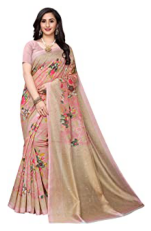

Predicted Label is: sarees

Input Image is: img_62.jpeg


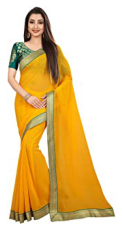

Predicted Label is: sarees

Input Image is: img_63.jpeg


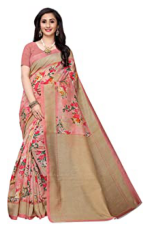

Predicted Label is: sarees

Input Image is: img_64.jpeg


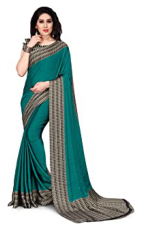

Predicted Label is: sarees

Input Image is: img_71.jpeg


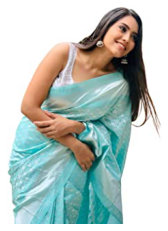

Predicted Label is: sarees

Input Image is: img_72.jpeg


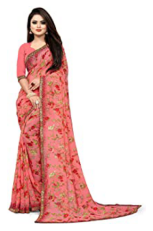

Predicted Label is: sarees

Input Image is: img_73.jpeg


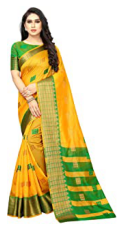

Predicted Label is: sarees

Input Image is: img_74.jpeg


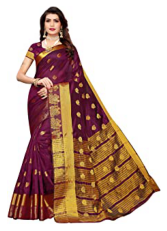

Predicted Label is: sarees

Input Image is: img_81.jpeg


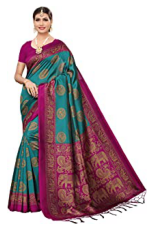

Predicted Label is: sarees

Input Image is: img_82.jpeg


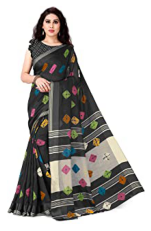

Predicted Label is: sarees

Input Image is: img_83.jpeg


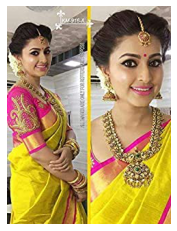

Predicted Label is: sarees

Input Image is: img_84.jpeg


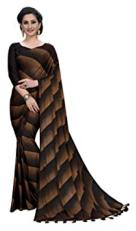

Predicted Label is: sarees

Input Image is: img_91.jpeg


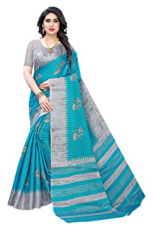

Predicted Label is: sarees

Input Image is: img_92.jpeg


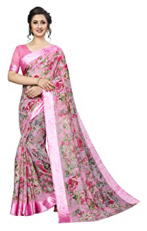

Predicted Label is: sarees

Input Image is: img_93.jpeg


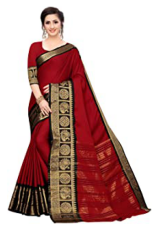

Predicted Label is: sarees

Input Image is: img_94.jpeg


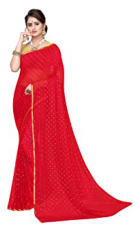

Predicted Label is: sarees

Input Image is: img_101.jpeg


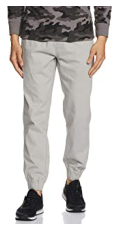

Predicted Label is: trouser

Input Image is: img_102.jpeg


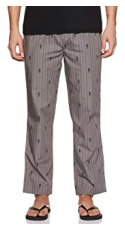

Predicted Label is: trouser

Input Image is: img_103.jpeg


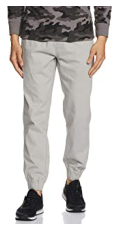

Predicted Label is: trouser

Input Image is: img_104.jpeg


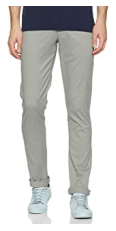

Predicted Label is: trouser

Input Image is: img_111.jpeg


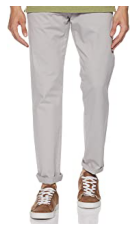

Predicted Label is: trouser

Input Image is: img_112.jpeg


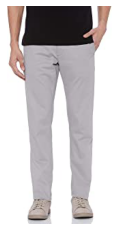

Predicted Label is: trouser

Input Image is: img_113.jpeg


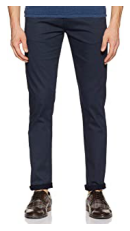

Predicted Label is: trouser

Input Image is: img_114.jpeg


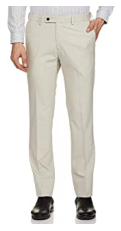

Predicted Label is: trouser

Input Image is: img_121.jpeg


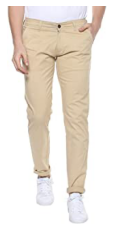

Predicted Label is: trouser

Input Image is: img_122.jpeg


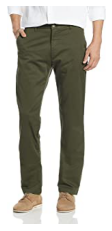

Predicted Label is: trouser

Input Image is: img_123.jpeg


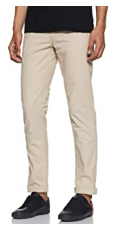

Predicted Label is: trouser

Input Image is: img_124.jpeg


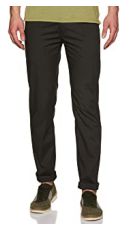

Predicted Label is: trouser

Input Image is: img_131.jpeg


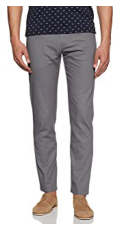

Predicted Label is: trouser

Input Image is: img_132.jpeg


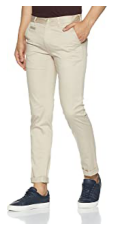

Predicted Label is: trouser

Input Image is: img_133.jpeg


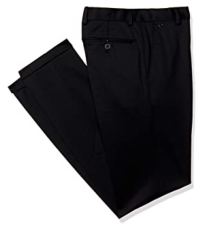

Predicted Label is: trouser

Input Image is: img_134.jpeg


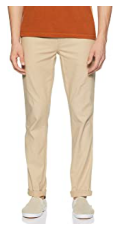

Predicted Label is: trouser

Input Image is: img_141.jpeg


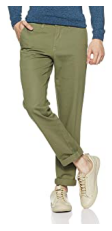

Predicted Label is: trouser

Input Image is: img_142.jpeg


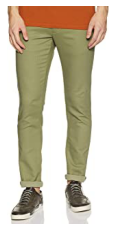

Predicted Label is: trouser

Input Image is: img_143.jpeg


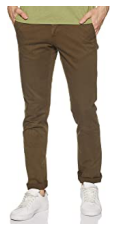

Predicted Label is: trouser

Input Image is: img_144.jpeg


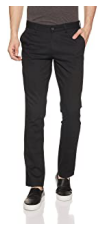

Predicted Label is: trouser

Input Image is: img_31.jpeg


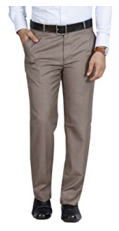

Predicted Label is: trouser

Input Image is: img_32.jpeg


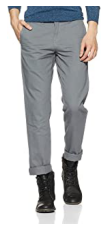

Predicted Label is: trouser

Input Image is: img_33.jpeg


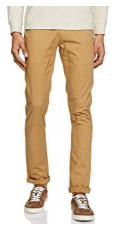

Predicted Label is: trouser

Input Image is: img_34.jpeg


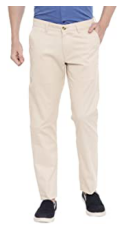

Predicted Label is: trouser

Input Image is: img_41.jpeg


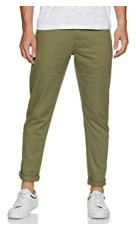

Predicted Label is: trouser

Input Image is: img_42.jpeg


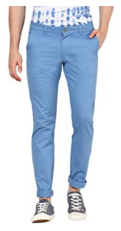

Predicted Label is: jeans

Input Image is: img_43.jpeg


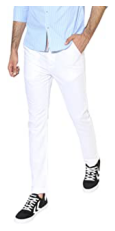

Predicted Label is: trouser

Input Image is: img_44.jpeg


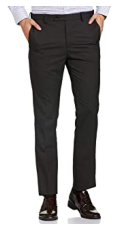

Predicted Label is: trouser

Input Image is: img_51.jpeg


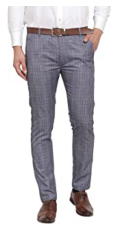

Predicted Label is: trouser

Input Image is: img_52.jpeg


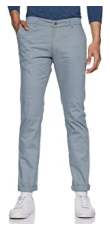

Predicted Label is: trouser

Input Image is: img_53.jpeg


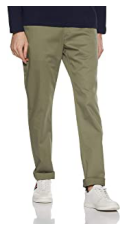

Predicted Label is: trouser

Input Image is: img_54.jpeg


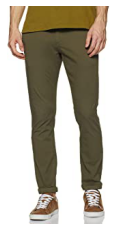

Predicted Label is: trouser

Input Image is: img_61.jpeg


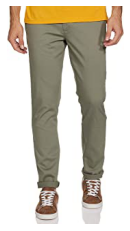

Predicted Label is: trouser

Input Image is: img_62.jpeg


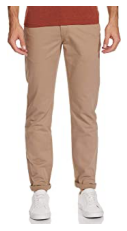

Predicted Label is: trouser

Input Image is: img_63.jpeg


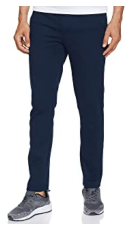

Predicted Label is: jeans

Input Image is: img_64.jpeg


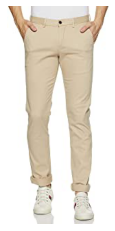

Predicted Label is: trouser

Input Image is: img_71.jpeg


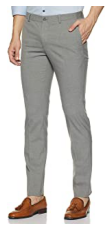

Predicted Label is: trouser

Input Image is: img_72.jpeg


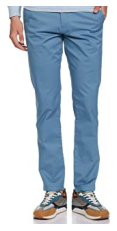

Predicted Label is: jeans

Input Image is: img_73.jpeg


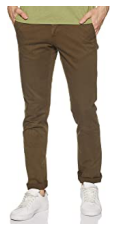

Predicted Label is: trouser

Input Image is: img_74.jpeg


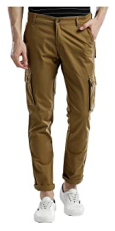

Predicted Label is: trouser

Input Image is: img_81.jpeg


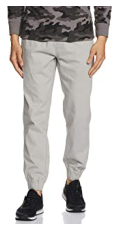

Predicted Label is: trouser

Input Image is: img_82.jpeg


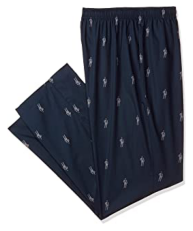

Predicted Label is: jeans

Input Image is: img_83.jpeg


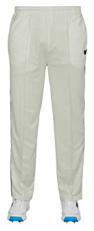

Predicted Label is: trouser

Input Image is: img_84.jpeg


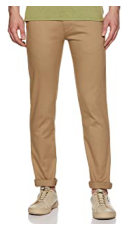

Predicted Label is: trouser

Input Image is: img_91.jpeg


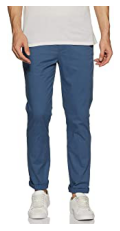

Predicted Label is: jeans

Input Image is: img_92.jpeg


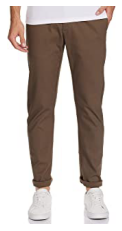

Predicted Label is: trouser

Input Image is: img_93.jpeg


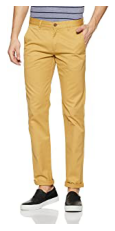

Predicted Label is: trouser

Input Image is: img_94.jpeg


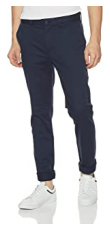

Predicted Label is: jeans



In [54]:
 #Predicted samples of the test images
test_jeans=r"C:/Users/verma/Desktop/Garments/Test/Jeans men"
test_Saree=r"C:/Users/verma/Desktop/Garments/Test/Sarees"
test_trouser=r"C:/Users/verma/Desktop/Garments/Test/Trouser men"


Predicted_class=[]
classes=[test_jeans,test_Saree,test_trouser]
for test_dir in classes:
    for i in listdir(test_dir):
        print("Input Image is:",i)
        img= image.load_img('{}/{}'.format(test_dir,i))                         
        test_image = image.load_img('{}/{}'.format(test_dir,i),target_size=(576, 576))
        test_image = image.img_to_array(test_image)
        plt.imshow(img)
        plt.axis('off')
        plt.show()
        test_image = np.expand_dims(test_image, axis=0)
        result = saved_model.predict(test_image)
        final=np.argmax(result, axis=1)[0]
        if final==0:
            print("Predicted Label is: jeans\n")
            Predicted_class.append("Jeans men")
        elif final==1:
            print("Predicted Label is: sarees\n")
            Predicted_class.append("Sarees")
        elif final==2:
            print("Predicted Label is: trouser\n")
            Predicted_class.append("trouser men")

# DataFrame to show the Actual and Predicted Label

In [56]:

res = pd.DataFrame()
res['Predicted_Label']=Predicted_class
res['Actual_Label']=validation_generator.classes
res["Actual_Label"] = res["Actual_Label"].replace({0: 'jeans men', 1: 'Sarees',2:'Trouser men'})
res

Predicted_Label Actual_Label
0       trouser men    jeans men
1       trouser men    jeans men
2         Jeans men    jeans men
3         Jeans men    jeans men
4       trouser men    jeans men
..              ...          ...
139     trouser men  Trouser men
140       Jeans men  Trouser men
141     trouser men  Trouser men
142     trouser men  Trouser men
143       Jeans men  Trouser men

[144 rows x 2 columns]